In [1]:
from matplotlib.pyplot import *;
from numpy import *;
from control.matlab import *;
import math;

use_numpy_matrix(flag=False, warn=True)

In [2]:
# Sustav u vremenskoj domeni.
A = array( [
    [0, 1],
    [-25, -4] 
] );
B = array( [
    [1, 1],
    [0, 1] 
] );
C = array( [[1, 0]] );
D = array( [[0, 0]] );
sys_t = ss( A, B, C, D );

sys_t

<LinearIOSystem:sys[2]:['u[0]', 'u[1]']->['y[0]']>

In [3]:
# "Ručna" konverzija u frekvencijsku domenu.
# Brojnik i nazivnik su p x m matrice.
# Svaki element (i, j) tih matrica je lista koeficijenata polinoma brojnika i nazivnika, 
# počevši od vodećeg člana.
# Kod nas: p = 1, m = 2, G(s) = [ (s+4)/(s^2+4s+25), (s+5)/(s^2+4s+25) ] = [G_1(s), G_2(s)].
# Dakle, 
#    brojnik = [ [ [koeficijenti od s+4], [koeficijenti od s+5] ] ]
#    nazivnik = [ [ [koeficijenti od s^2+4s+25], [koeficijenti od s^2+4s+25] ] ]
brojnik = [ [ [1, 4], [1, 5] ] ];
nazivnik = [ [ [1, 4, 25], [1, 4, 25] ] ];

sys_f = tf( brojnik, nazivnik );
print( sys_f );

# Napomena:
# Kada sustav ima samo 1 input i 1 output (SISO), onda su brojnik i nazivnik 
# samo liste koeficijenata (npr. br=[1, 4], naz=[1, 4, 25]).


Input 1 to output 1:
    s + 4
--------------
s^2 + 4 s + 25

Input 2 to output 1:
    s + 5
--------------
s^2 + 4 s + 25



/home/zvonimir/Programming/miniconda3/envs/uutu2023/lib/python3.11/site-packages/control/timeresp.py:940: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


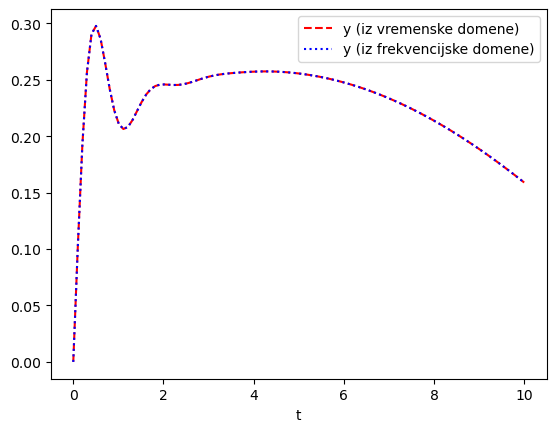

In [4]:
# Uvjerimo se da sustavi imaju isti odziv na npr. sinusoidalni ulaz.
# Simulacija pomoću funkcije lsim iz modula control.

# Vremenski interval i input;
t = linspace( 0, 10, 100 );

# Input.
def uu( t ):
    return [sin( t/20*math.pi ), cos( t/20*math.pi )];
    
u = list( map( uu, t ) );

# Početno stanje.
x0 = array( [[0], [0]] );

# Simulacija sustava u vremenskoj domeni.
[yout_t, tout_t, xout_t] = lsim( sys_t, u, t, x0 );

# Simulacija sustava u frekvencijskoj domeni.
[yout_f, tout_f, xout_f] = lsim( sys_f, u, t, x0 );

# Nacrtaj oba odziva.
%matplotlib inline

f = figure;
plot( tout_t, yout_t, 'r--', label='y (iz vremenske domene)' );
plot( tout_f, yout_f, 'b:', label='y (iz frekvencijske domene)' );
xlabel( 't' );
legend();
show();

In [5]:
# Konverziju može napraviti i funkcija ss2tf.
# Uz donju verziju, radi i sys_f2 = ss2tf( A, B, C, D );
sys_f2 = ss2tf( sys_t );
print( sys_f2 );


Input 1 to output 1:
    s + 4
--------------
s^2 + 4 s + 25

Input 2 to output 1:
    s + 5
--------------
s^2 + 4 s + 25



In [6]:
# Radi i konverzija u suprotnom smjeru pomoću tf2ss.
# Uočite da ne daje nužno istu realizaciju kao sys_t!
sys_t2 = tf2ss( sys_f );
print( sys_t2 );

A = [[-4.96414992 -3.28442449]
     [ 9.06892055  0.96414992]]

B = [[0.61769914 0.77097228]
     [0.23306288 0.        ]]

C = [[1.29706349 0.85301013]]

D = [[0. 0.]]



In [7]:
# Možemo i izračunati funkciju transfera u nekoj točki pomoću funkcije evaltf.
s = 3 + 1j;
print( evalfr( sys_f, s ) );222222222222222222222222222222

# "Ručno" izvrednjavamo funkciju transfera.
tfs = [ (s+4)/(s*s+4*s+25), (s+5)/(s*s+4*s+25)];
print( tfs );

[[0.15294118-0.01176471j 0.17411765-0.01647059j]]
[(0.15294117647058825-0.011764705882352938j), (0.17411764705882352-0.016470588235294115j)]
